# Criminalità Italia - Data Visualization


## Librerie
1. Folium
    - conda install -c conda-forge folium=0.2.1

In [1]:
# Librerie
import os
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Cartelle Input/Output
dir_df = os.path.join(os.path.abspath(''),'stg')
dir_out = os.path.join(os.path.abspath(''),'output')

In [4]:
df_reg_filename = r'df_reg.pkl'
df_reg_fullpath = os.path.join(dir_df, df_reg_filename)
df_reg = pd.read_pickle(df_reg_fullpath)

### Totale Omicidi Volontari Italia

In [5]:
df_reg.sum()

Territorio    AbruzzoBasilicataCalabriaCampaniaEmilia-Romagn...
Value                                                       475
dtype: object

### Distribuzione Omicidi Volontari per Regione Italiana

In [6]:
regioni_geo_filename = r'regioni.geojson'
regioni_geo = os.path.join(dir_df, regioni_geo_filename)

reg_map = folium.Map(location=[42, 12], zoom_start=5)
reg_map.choropleth(geo_path=regioni_geo, data=df_reg,
                  columns=['Territorio', 'Value'],
                  key_on='feature.properties.NOME_REG',
                  fill_color='YlOrRd')

reg_map.save(os.path.join(dir_out,r'omicidi_volontari.html'))
reg_map

/Users/cesar/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


### Top 3 Regioni Pericolose - Numero Omicidi Volontari

In [7]:
# Top 3 Regioni
df_reg_top3=df_reg.sort_values(by='Value',ascending=False).head(3)
df_reg_top3.to_csv(os.path.join(dir_out,r'Top3_Regioni.csv'),header=True, index=False)
df_reg_top3

,Territorio,Value
22,Campania,67.0
59,Lombardia,67.0
53,Lazio,58.0


### Top 10 Città Pericolose

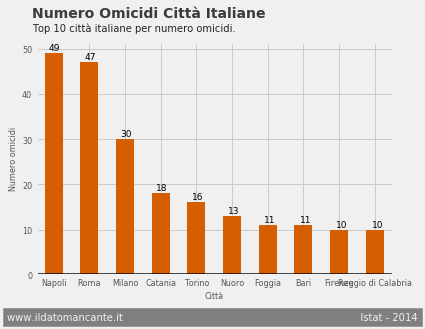

In [41]:
df_cit_top_filename = r'df_cit_top.pkl'
df_cit_top_fullpath = os.path.join(dir_df, df_cit_top_filename)
df_cit_top = pd.read_pickle(df_cit_top_fullpath)
# Report
style.use('fivethirtyeight')
# Colorblind-friendly colors
colors = [[213/255,94/255,0]]
tp = df_cit_top.plot(
        x=df_cit_top['Territorio'],
        kind='bar',
        legend = False,
        figsize = (6,4),
        color = colors)

for p in tp.patches:
    tp.annotate(str(round(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), ha='center', va='center', xytext=(10, 5), textcoords='offset points',fontsize=9)
    tp.plot()
    
tp.tick_params(axis = 'both', which = 'major', labelsize = 8)

tp.set_ylabel('Numero omicidi',fontsize=8)
tp.set_xlabel('Città',fontsize=8)

tp.axhline(y = 0, color = 'black', linewidth = 4, alpha = 0.7)

text = tp.text(x = -1.3, y = -10,
    s = 'www.ildatomancante.it                                                                            Istat - 2014',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle Reddito e aspettativa di vita
tp.text(x = -0.6, y = 57, s = "Numero Omicidi Città Italiane",
                   fontsize = 14, weight = 'bold', alpha = .75)
tp.text(x = -0.6, y = 54, 
                   s = "Top 10 città italiane per numero omicidi.",
                  fontsize = 10, alpha = .85)

plt.xticks(rotation=0)
fig_prj = tp.get_figure()
fig_prj.tight_layout()
fig_prj.savefig(os.path.join(dir_out,'topcitta.png'), format='png', dpi=300)

### 2. Paesi Unione Europea

In [42]:
df_eur_filename = r'df_eur.pkl'
df_eur_fullpath = os.path.join(dir_df, df_eur_filename)
df_eur = pd.read_pickle(df_eur_fullpath)

In [44]:
europa_geo_filename = r'euro.geojson'
europa_geo = os.path.join(dir_df, europa_geo_filename)

eur_map = folium.Map(location=[48, 10], zoom_start=4)
eur_map.choropleth(geo_path=europa_geo, data=df_eur,
                  columns=['geo', 'Value'],
                  key_on='feature.properties.iso_a2',
                  fill_color='YlOrRd')

reg_map.save(os.path.join(dir_out,r'omicidi_volontari_eu.html'))

eur_map

/Users/cesar/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


In [45]:
# Top 3 Paesi
df_eur_top3=df_eur.sort_values(by='Value',ascending=False).head(3)
df_eur_top3

,geo,Value
104,FR,792.0
62,DE,645.0
139,IT,475.0


### Top Città Europee Pericolose - (Dati Eurostat non sembrani Buoni)

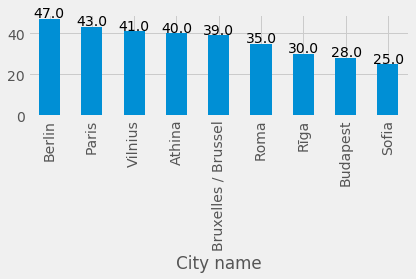

In [46]:
df_eur_cit_filename = r'df_eur_cit.pkl'
df_eur_cit_fullpath = os.path.join(dir_df, df_eur_cit_filename)
df_eur_cit = pd.read_pickle(df_eur_cit_fullpath)
# Report
tp1 = df_eur_cit.plot(
        x=df_eur_cit['City name'],
        kind='bar',
        legend = False)
for p in tp1.patches:
    tp1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), ha='center', va='center', xytext=(10, 5), textcoords='offset points')
    tp1.plot()

fig_eur = tp1.get_figure()
fig_eur.tight_layout()
fig_eur.savefig(os.path.join(dir_out,'topeurcitta.png'), format='png', dpi=300)